<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: Appreciating, Interpreting and Visualizing Data**

Project

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:
-age
-sex
-chest pain type (4 values)
-resting blood pressure
-serum cholestoral in mg/dl
-fasting blood sugar > 120 mg/dl
-resting electrocardiographic results (values 0,1,2)
-maximum heart rate achieved
-exercise induced angina
-oldpeak = ST depression induced by exercise relative to rest
-the slope of the peak exercise ST segment
-number of major vessels (0-3) colored by flourosopy
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [6]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [7]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation


In [10]:
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.


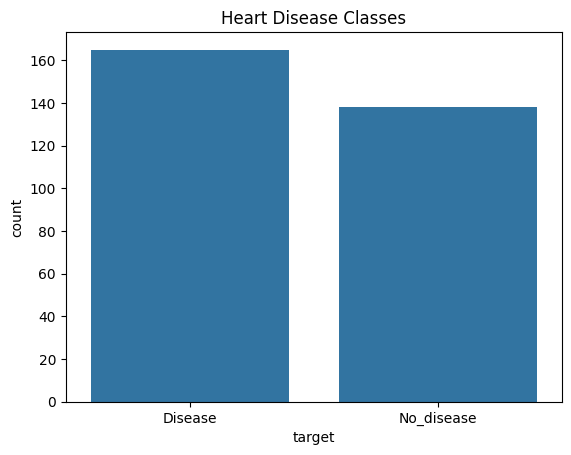

In [11]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

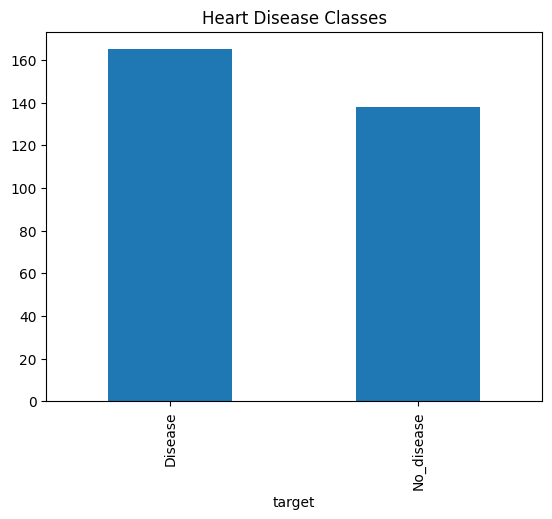

In [12]:
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

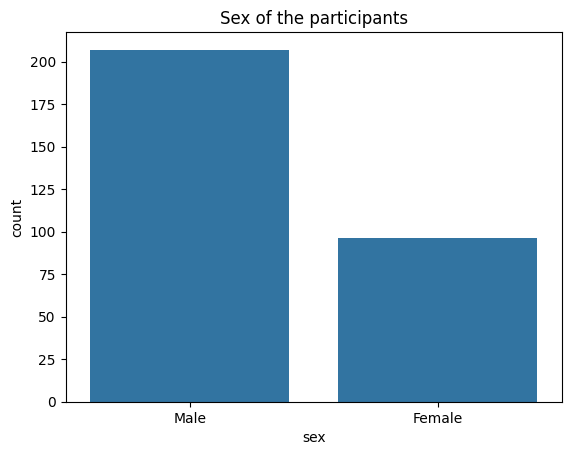

In [13]:
sns.barplot(data['sex'].value_counts())
plt.title('Sex of the participants')
plt.show()

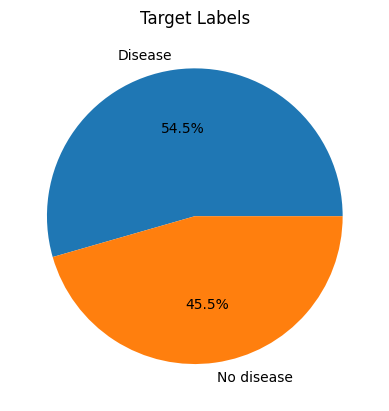

In [14]:
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

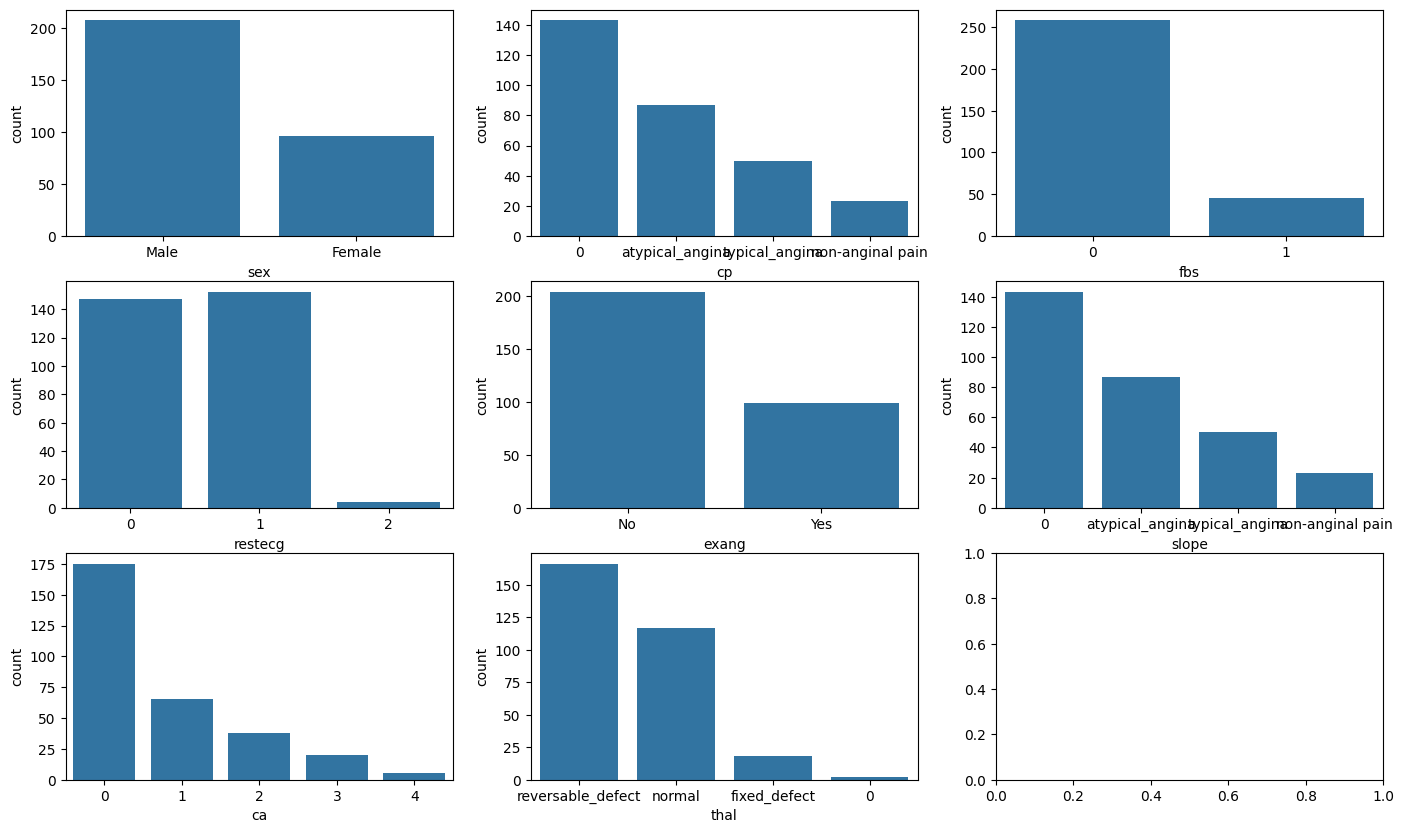

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

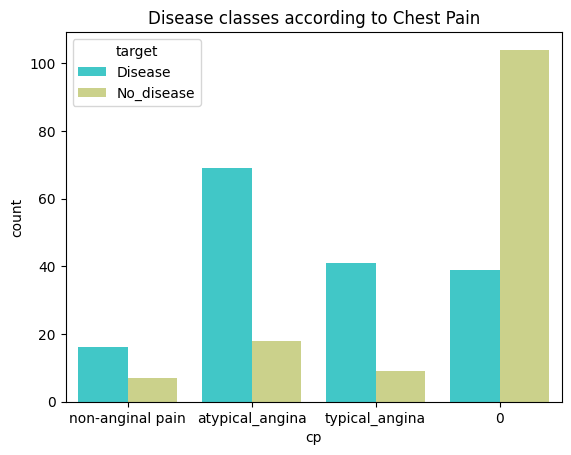

In [16]:
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

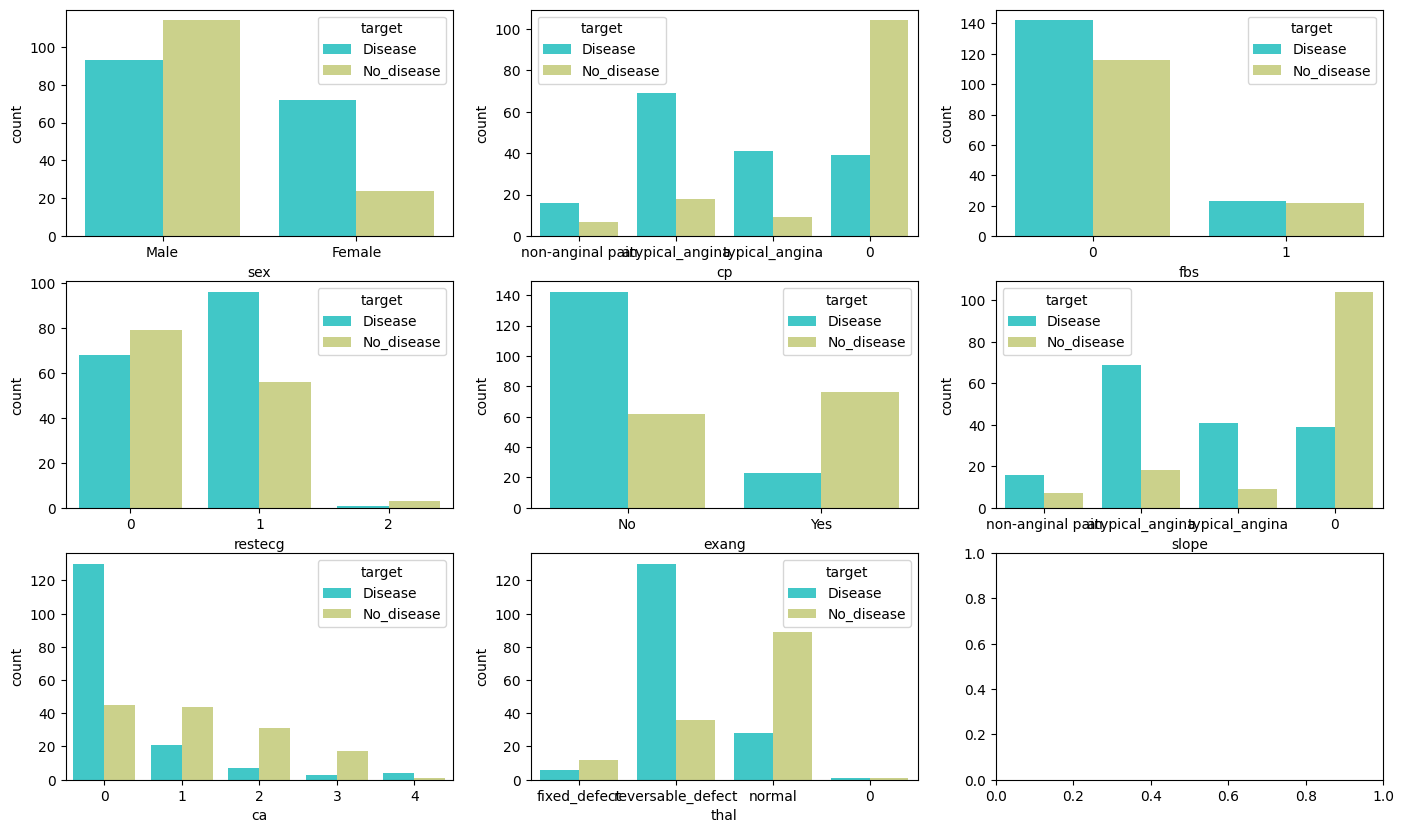

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, palette='rainbow', ax=ax)

Visualising the distribution of the continous variables

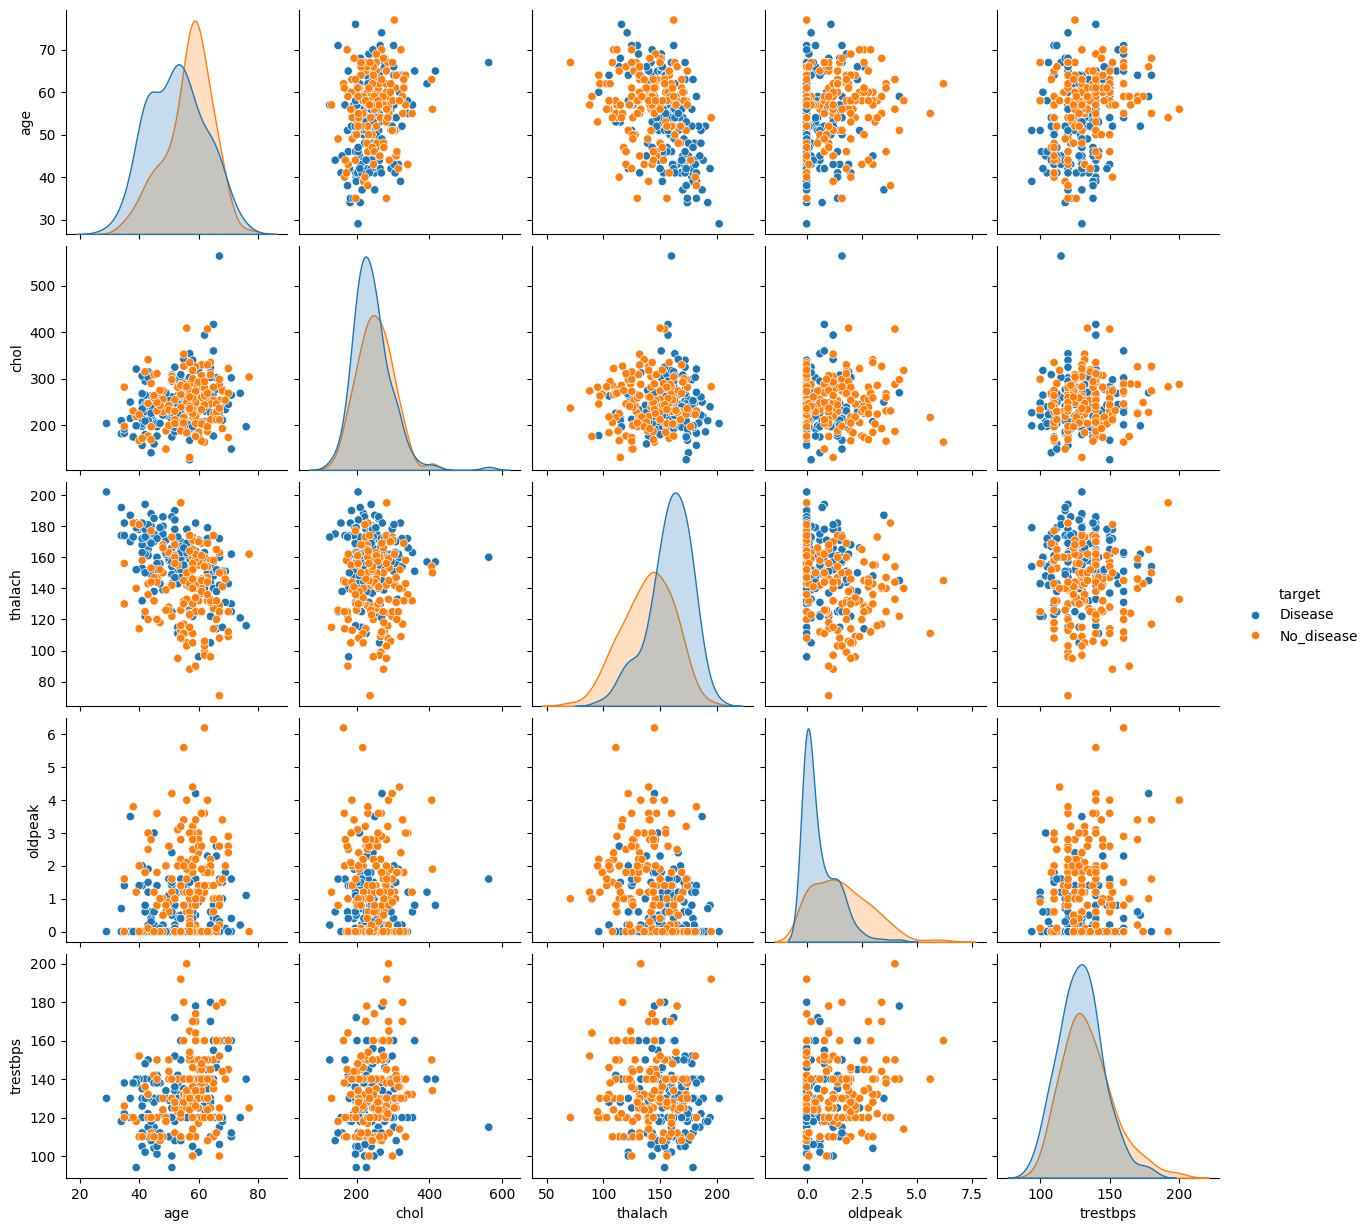

In [18]:
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

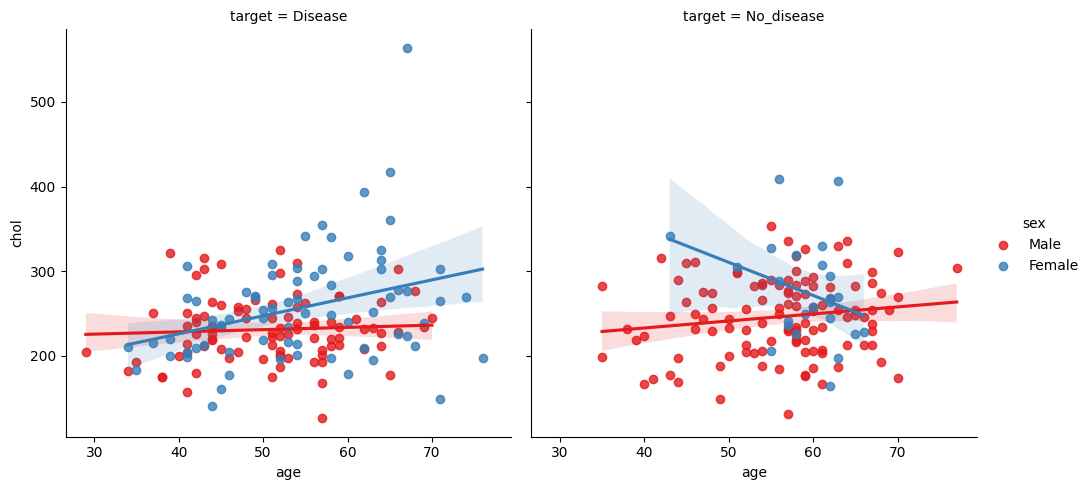

In [19]:
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

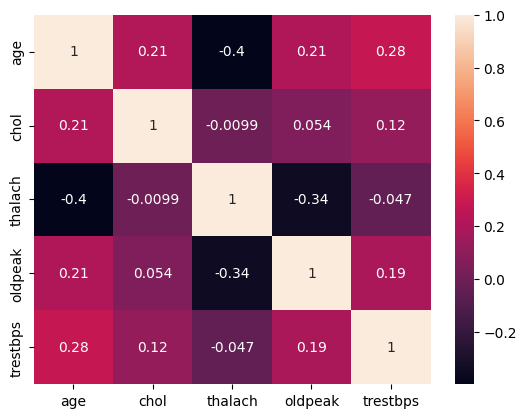

In [20]:
numeric_data = data[continous_features]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

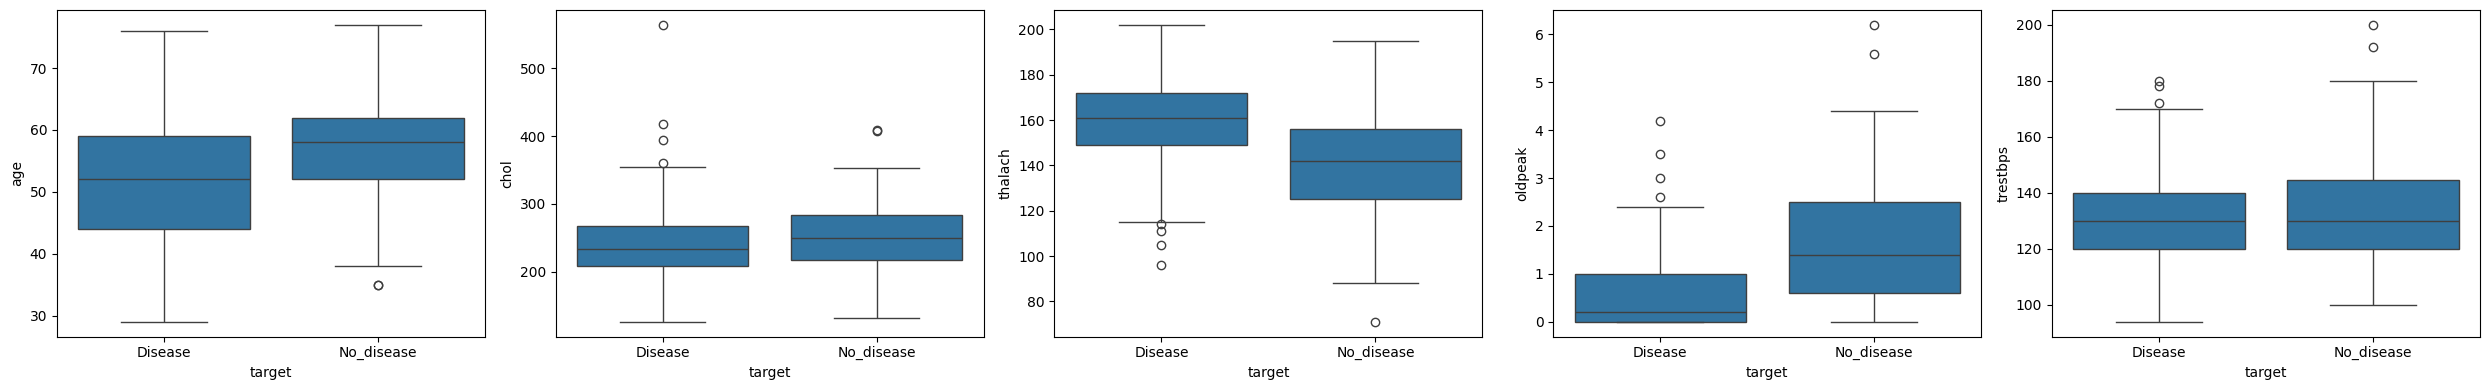

In [21]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

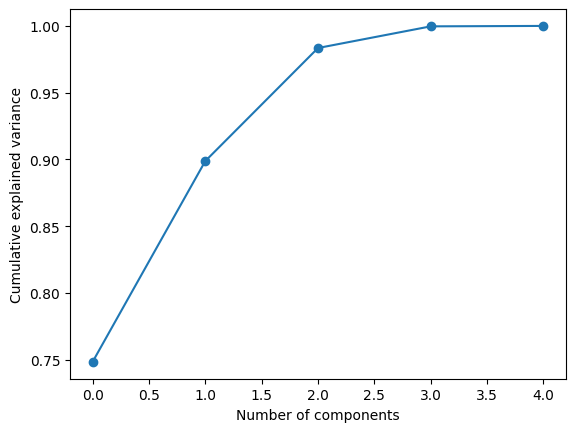

In [22]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

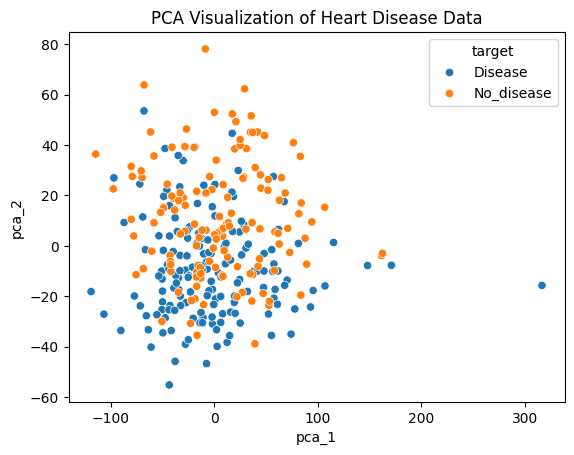

In [23]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()

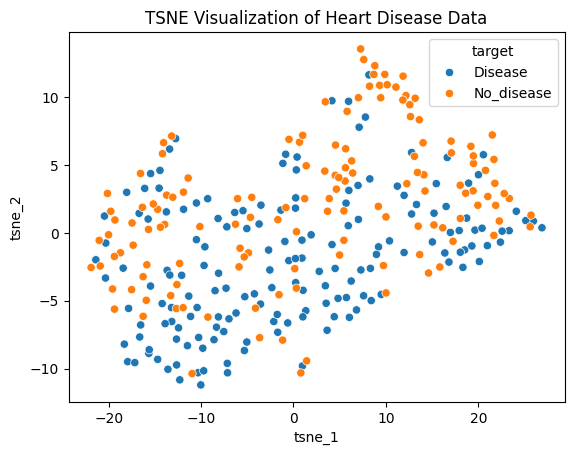

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [27]:
disease_percentage = (data['target'].value_counts(normalize=True) * 100)['Disease']
print(f"Percentage of Samples with Disease: {disease_percentage:.2f}%")

Percentage of Samples with Disease: 54.46%


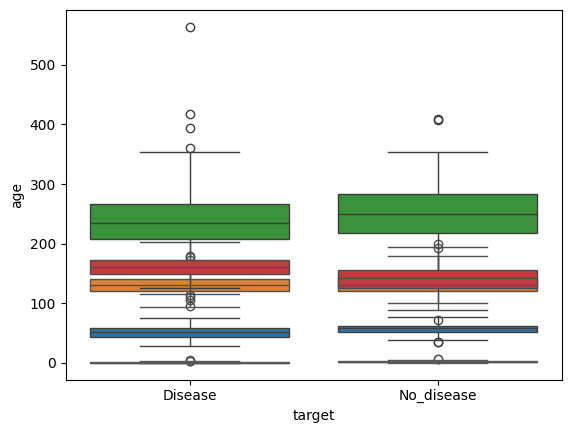

In [28]:
#what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in continuous_vars:
    sns.boxplot(x='target', y=var, data=data)

In [29]:
#3. Can we see a clear separation in terms of the presence/absence of disease in the features obtained from PCA and t-SNE plots?
# answer: Yes we can see them from the scatterplots.

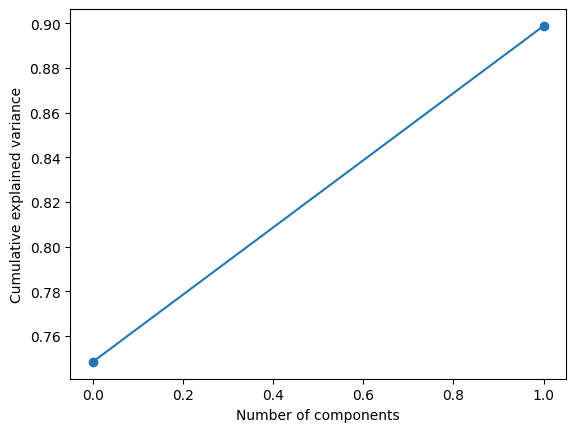

In [30]:
#4. What is the optimal number of principal components in our case?
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [31]:
#5. What are the continuous features with the highest correlation with each other?
# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Find the pairs with the highest correlation
highest_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
highest_corr_pairs = highest_corr_pairs[highest_corr_pairs < 1]
most_correlated_features = highest_corr_pairs.idxmax()
print(f"Continuous features with the highest correlation: {most_correlated_features}")

Continuous features with the highest correlation: ('thalach', 'age')


Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [32]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [33]:
data = pd.read_csv("star_nutri_expanded.csv")

In [34]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [35]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [36]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [37]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [39]:
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [40]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [41]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [42]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [43]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [44]:
data = data.replace({True: 1, False: 0})

In [45]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-45-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [46]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

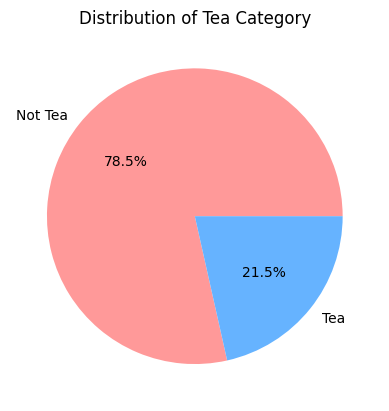

Observations from the pie chart:
Percentage of 'Tea' entries: 21.49%
Percentage of 'Not Tea' entries: 78.51%


In [48]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot

tea_counts = data['Tea'].value_counts()
plt.pie(tea_counts, labels=['Not Tea', 'Tea'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Tea Category')
plt.show()

print("Observations from the pie chart:")
print(f"Percentage of 'Tea' entries: {tea_counts[1] / tea_counts.sum() * 100:.2f}%")
print(f"Percentage of 'Not Tea' entries: {tea_counts[0] / tea_counts.sum() * 100:.2f}%")

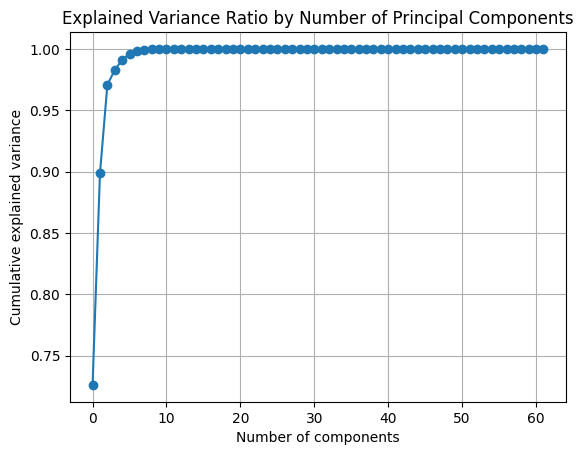

Optimal number of principal components:
3


In [49]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
pca = PCA()
pca.fit(data)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.grid()
plt.show()

print("Optimal number of principal components:")
print(np.argmax(explained_variance_ratio >= 0.95) + 1)

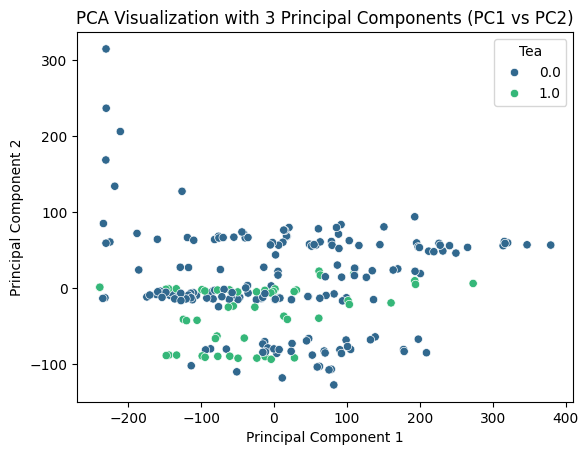

Observations from the PCA plot:
The plot visualizes the data points in terms of the first two principal components.
Look for clusters or patterns to understand how the data is distributed with respect to the principal components.


In [50]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data)

pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "pca_3": pca_data[:, 2]
})

sns.scatterplot(x="pca_1", y="pca_2", hue=data["Tea"], palette='viridis', data=pca_df)
plt.title("PCA Visualization with 3 Principal Components (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Observations from the PCA plot:")
print("The plot visualizes the data points in terms of the first two principal components.")
print("Look for clusters or patterns to understand how the data is distributed with respect to the principal components.")

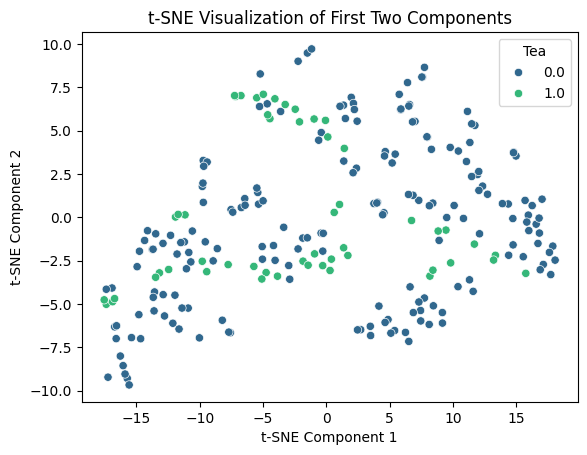

Observations from the t-SNE plot:
The plot visualizes the data points in terms of the first two t-SNE components.
Look for clusters or patterns to understand how well the t-SNE components differentiate between the classes.


In [51]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data)

tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "Tea": data["Tea"]  # Include 'Tea' for color coding
})

sns.scatterplot(x="tsne_1", y="tsne_2", hue="Tea", palette='viridis', data=tsne_df)
plt.title("t-SNE Visualization of First Two Components")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

print("Observations from the t-SNE plot:")
print("The plot visualizes the data points in terms of the first two t-SNE components.")
print("Look for clusters or patterns to understand how well the t-SNE components differentiate between the classes.")

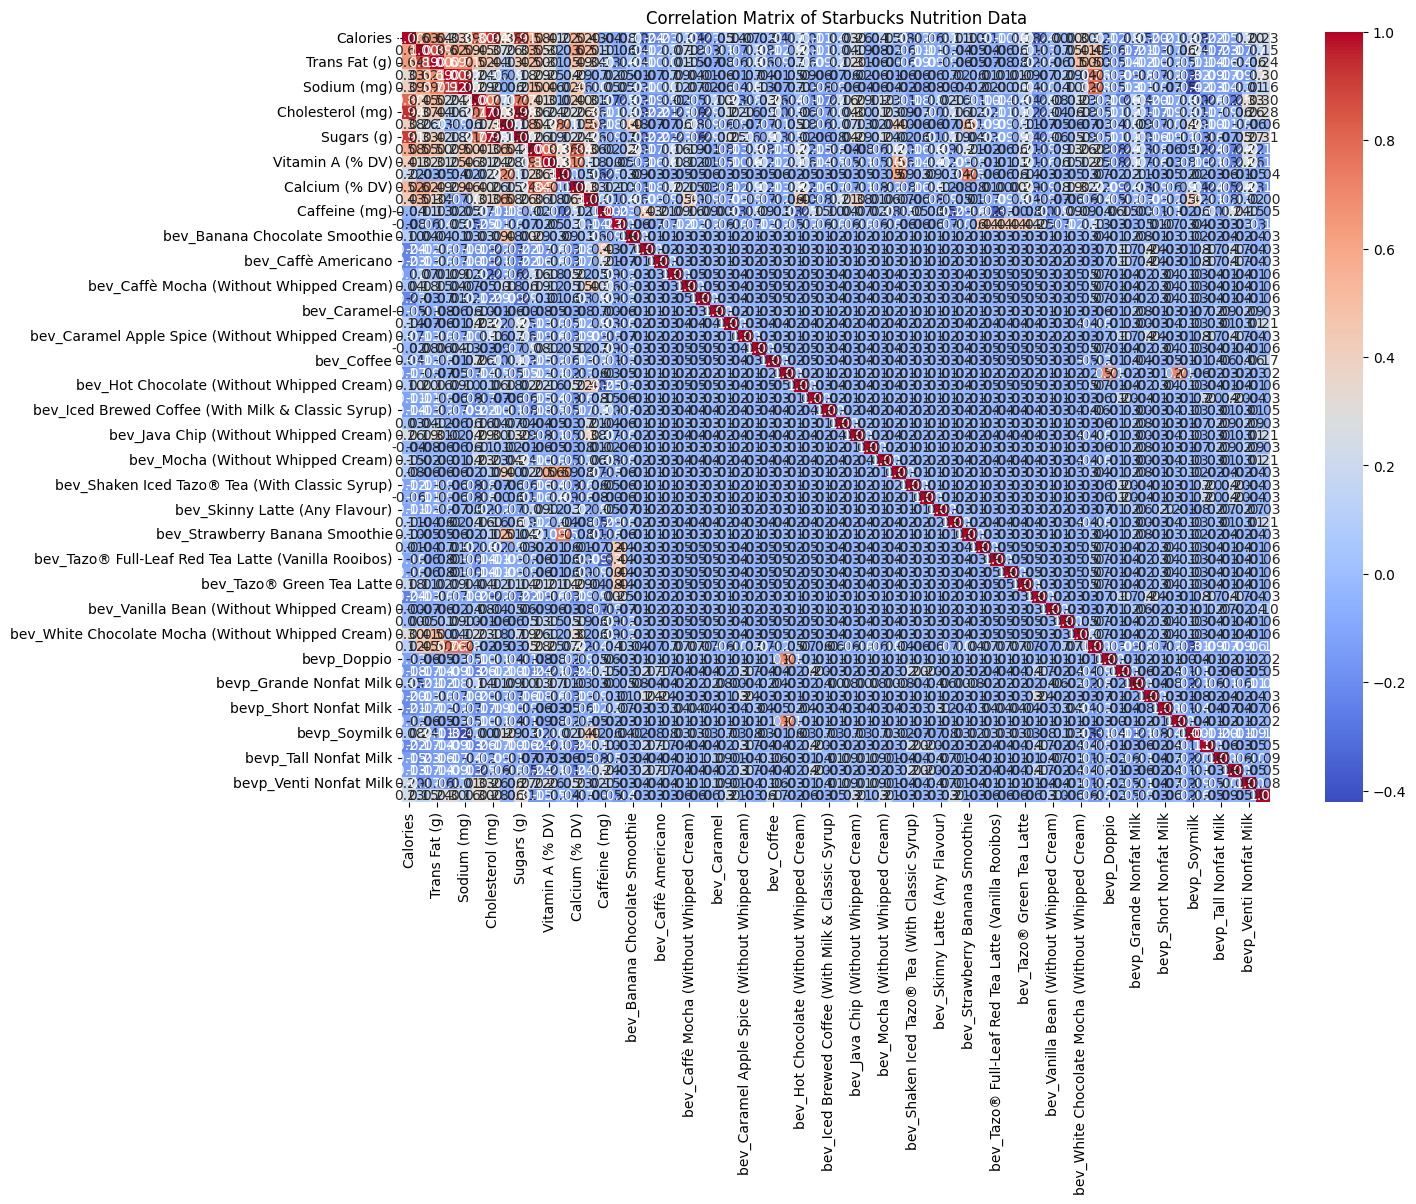

In [58]:
# to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?

import pandas as pd # Import pandas for DataFrame manipulation
import seaborn as sns # Import seaborn for heatmap plotting
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Assuming 'data' is your DataFrame, replace 'data' with the actual name if it's different
numeric_columns = data.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Starbucks Nutrition Data')
plt.show()

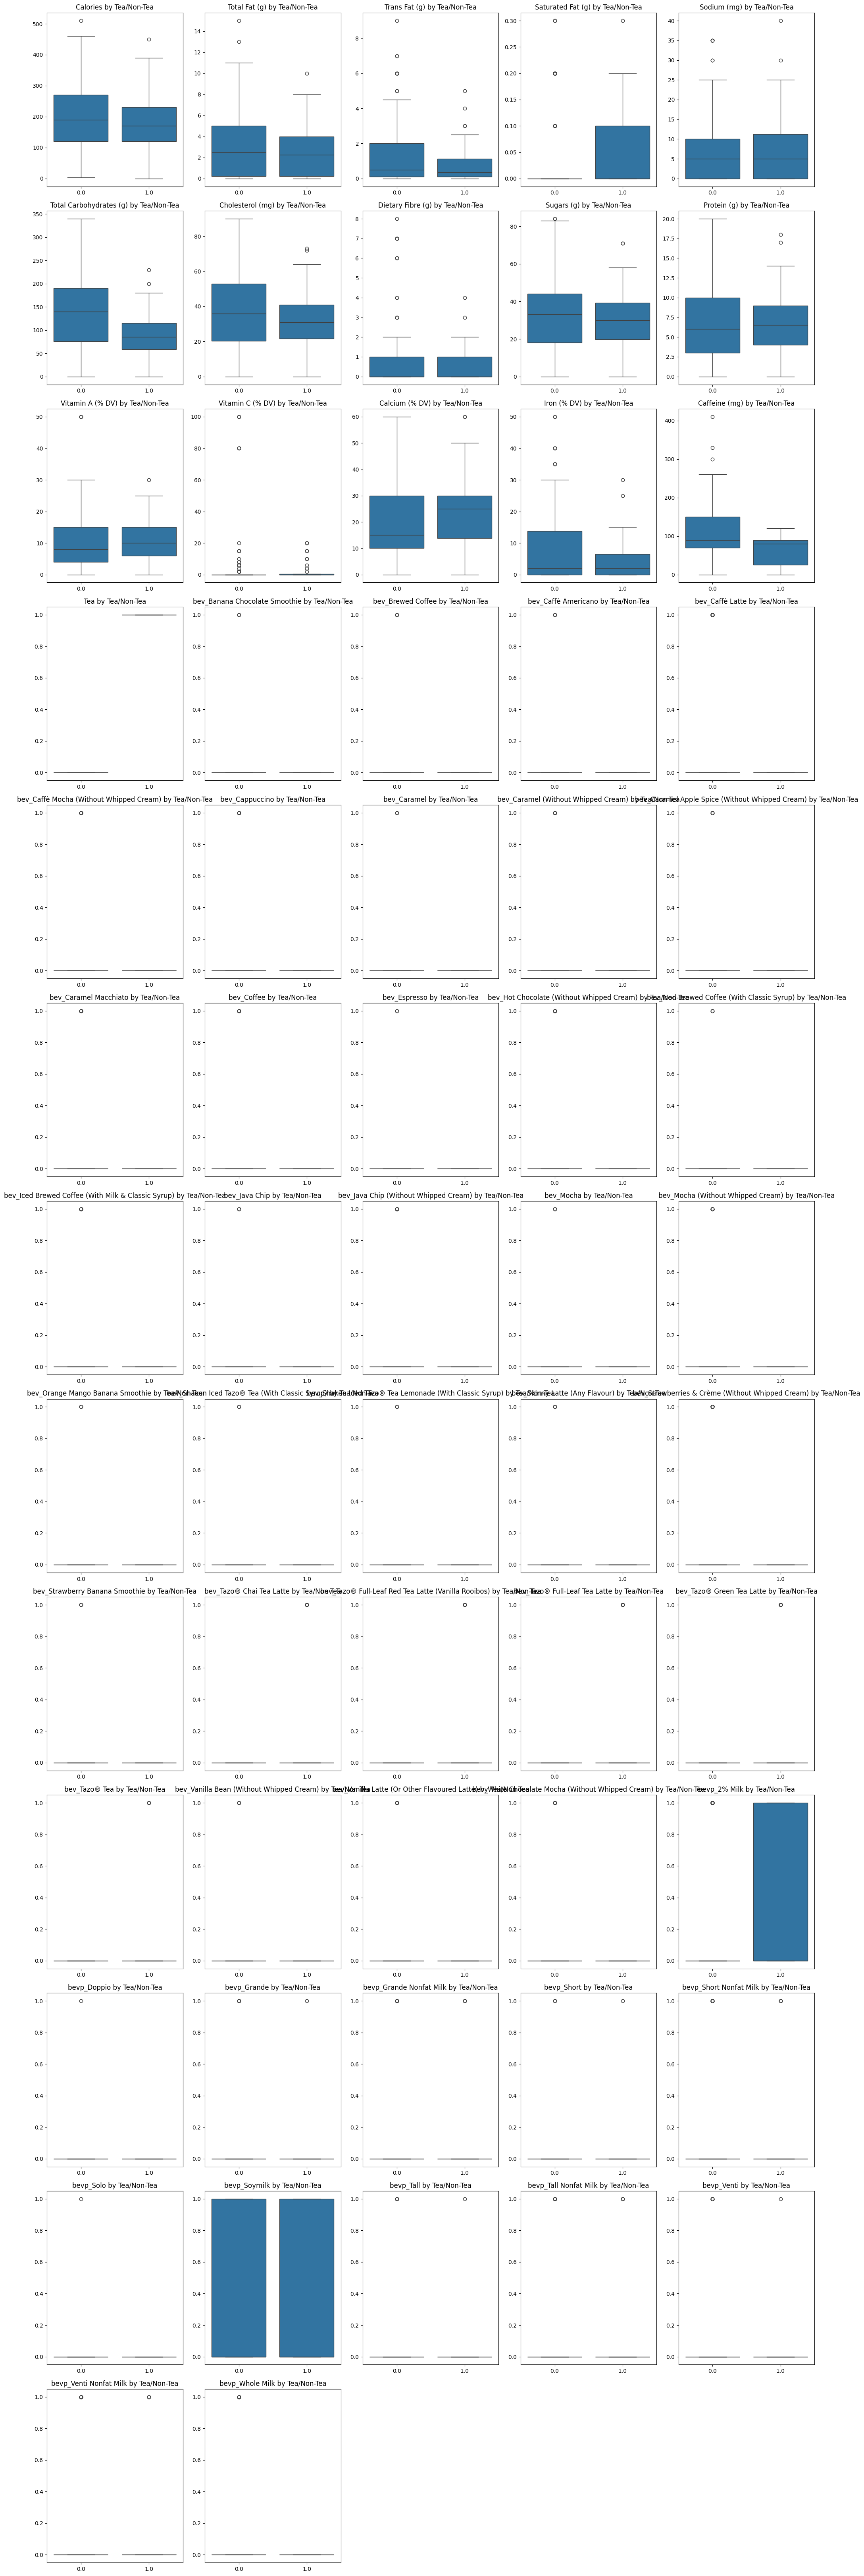

In [59]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
# Select numeric columns
numeric_columns = data.select_dtypes(include=["int64", "float64"])

# Determine the number of rows and columns for subplots
num_columns = len(numeric_columns.columns)
num_rows = (num_columns // 5) + (1 if num_columns % 5 != 0 else 0)

# Create a boxplot for each numeric column
plt.figure(figsize=(20, num_rows * 5))
for idx, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(num_rows, 5, idx)
    sns.boxplot(x='Tea', y=column, data=data)
    plt.title(f'{column} by Tea/Non-Tea')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data. Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables. Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.